In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
def convert_to_sec(args):
    largs = list(args)
    return 3600 * largs[0] + 60 * largs[1] + largs[2]

In [113]:
def preprocess(date : str):
    # 읽기
    data = pd.read_csv("data\관02_" + date + ".csv")
    
    # column 따두기 및 맨 윗줄 지우기
    columns = data.iloc[0, 2:12]
    columns[0] = "환산시각(초)"
    columns[-1] = "버스 환산시각(초)"
    data = data.drop(0, axis=0)

    # 시각 빈곳 채우기
    for i in range(3):
        for j in range(data.shape[0]):
            if data.iloc[j, i] is np.NaN:
                data.iloc[j, i] = data.iloc[j - 1, i]

    # 아랫쪽 빈곳 지우기
    key = [row + 1 for row in range(data.shape[0]) if all(data.iloc[row, 0:8].isnull())]
    data = data.drop(key, axis=0)
    
    # 시간 변환하기 및 column 세팅하기
    for i in range(data.shape[0]):
        data.iloc[i, 2] = convert_to_sec(map(int, data.iloc[i, 0:3]))
        if sum(data.iloc[i, 11:14].notna()):
            data.iloc[i, 11] = convert_to_sec(map(int, data.iloc[i, 11:14]))
    data = data.iloc[:, 2:12]
    data.columns = columns
    data = data.drop(["버스 오기 전", "버스 번호"], axis=1)

    return data

In [121]:
def draw_two_graphs(data):
    sns.kdeplot(data)
    sns.histplot(data)

In [122]:
def draw(data):
    # 버스 소요 시간
    bus_time = []
    for i in range(data.shape[0]):
        if data.iloc[i, -1] is not np.nan:
            bus_time.append(data.iloc[i, -1] - data.iloc[i, 0])
    draw_two_graphs(bus_time)

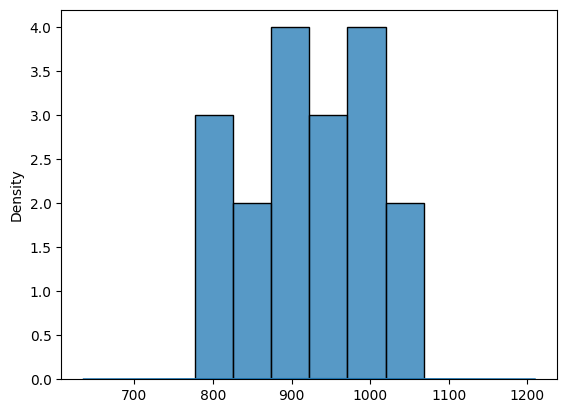

In [123]:
dates = ["1122"]
for date in dates:
    data = preprocess(date)
    draw(data)